# Vector Rayleigh-Sommerfeld method: Improvement in vacuum lens


En VRS_paper hemos desarrollado los algoritmos de Citation Huapeng Ye et al 2013 Laser Phys. Lett. 10 065004 https://iopscience.iop.org/article/10.1088/1612-2011/10/6/065004

Este artículo es estupendo, pues nos permite propagar el campo eléctrico de forma vectorial con un algoritmo muy rápido. 

**Problemas**:
- El campo de entrada es (Ex, Ey, 0), es decir no tiene componente longitudinal
- La función de propagación no es simétrica
- No se puede pasar de campo Ex a Ey (el cuadrupolo) ni de Ez a (Ex,Ey)

Por otro lado, viendo los resultados para tamaños tan pequeños, la calidad de propagación es muy alta incluso para distancias mínimas. Esto permitirá propagar como si fuera una algoritmo de $\Delta z$ en lugar de ser un algoritmo de salto.

**Propuesta**:
1. Simetrizar la ecuación de propagación de VRS
1. Propagar en el vacío mediante un algoritmo de salto para ver si se puede obtener el cuadrupolo
1. Propagar a través de los materiales mediante un algortimos similar a WPM.

Aquí seguimos por la difracción por una lente, a ver que tal se da. No será una lente compelja, como la de generar haces longitudinales, sino una lente estańdard.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

In [3]:
from matplotlib import rcParams
rcParams['figure.dpi']=300
from matplotlib import cm

In [4]:
from diffractio import np, sp, plt, nm, um, mm, degrees

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY

import copy

number of processors: 8
total memory        : 15.5 Gb
available memory    : 56 %
max frequency       : 3100 GHz


In [5]:
from VRS_improvements import VRS, VRS_proposal_1, VRS_proposal_2, VRS_proposal_3, VRS0, VRS_proposal_0

In [6]:
kernel_proposal = VRS_proposal_0

## Definición de la lente

Tiene que tener una apertura numérica muy alta. Empezamos con una lente muy pequeña de focal muy pequeña también.
f' = 16.5 um y diámetro = 6.5 um también.
La longitud de onda es $\lambda$ = 0.6328 $\mu$m.

In [7]:
size=20*um
x0=np.linspace(-size+0.04,size,512)
y0=np.linspace(-size+0.04,size,512)
wavelength=2.2640*um
radius=20

In [8]:
focal=20
t=Scalar_mask_XY(x0,y0,wavelength)
t.lens(r0=(0,0), focal=focal, radius=radius)

In [30]:
E0 = Vector_source_XY(x0,y0,wavelength)
E0.constant_wave(u=t,v=(1,0),has_normalization=True)

### VRS normal

Good result: factor 20.47
Good result: factor 20.47
Good result: factor 20.47
CPU times: user 1.43 s, sys: 124 ms, total: 1.55 s
Wall time: 1.36 s


(<AxesSubplot:title={'center':'$I_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_z$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

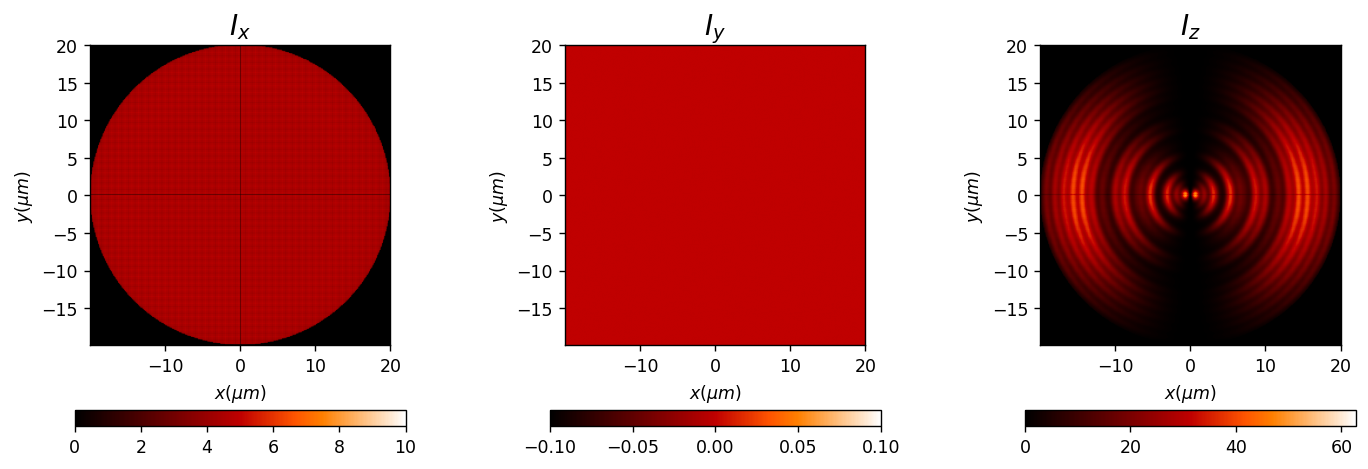

In [31]:
%%time
size_drawing=3
E_VRS_normal=E0.VRS(z=25*nm, n=1, new_field=True, verbose=True, amplification=(1,1))##
#E_VRS_normal.cut_resample([-size_drawing,size_drawing], [-size_drawing,size_drawing])
E_VRS_normal.draw(kind='intensities', logarithm=False);

Good result: factor 24.70
Good result: factor 24.70
Good result: factor 24.70
CPU times: user 1.35 s, sys: 107 ms, total: 1.46 s
Wall time: 1.24 s


(<AxesSubplot:title={'center':'$I_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_z$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

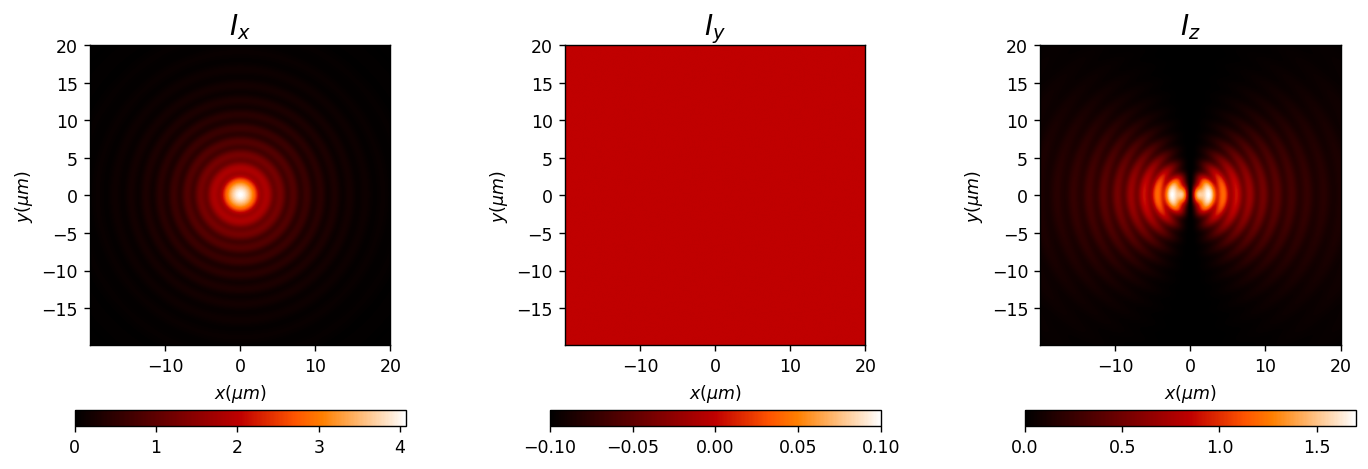

In [32]:
%%time
size_drawing=3
E_VRS_normal=E0.VRS(z=focal, n=1, new_field=True, verbose=True, amplification=(1,1))##
#E_VRS_normal.cut_resample([-size_drawing,size_drawing], [-size_drawing,size_drawing])
E_VRS_normal.draw(kind='intensities', logarithm=True);

In [33]:
print(np.abs(E_VRS_normal.Ex.max())**2, np.abs(E_VRS_normal.Ey.max())**2, np.abs(E_VRS_normal.Ez.max())**2)

4.873746930703361 0.0 3.389861832167388


Ya vemos que no sale nada en y

## Propuesta de modificación
- Hacerla más simétrica

Good result: factor 20.47
Good result: factor 20.47
Good result: factor 20.47
Good result: factor 20.47
Good result: factor 20.47
Good result: factor 20.47
1937573.4363798313
CPU times: user 2.22 s, sys: 150 ms, total: 2.37 s
Wall time: 2.18 s


(<AxesSubplot:title={'center':'$I_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_z$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

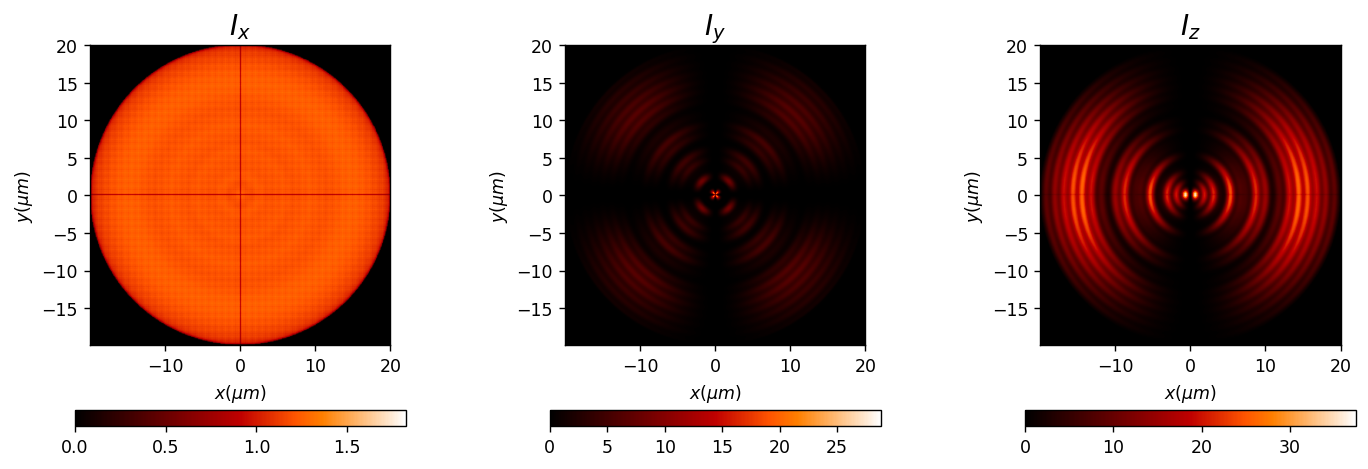

In [34]:
%%time
size_drawing=3
E_VRS_normal=kernel_proposal(E0, z=50*nm, n=1, new_field=True, verbose=True, amplification=(1,1))##
print(E_VRS_normal.get('intensity').sum())
#E_VRS_normal.cut_resample([-size_drawing,size_drawing], [-size_drawing,size_drawing])
E_VRS_normal.draw(kind='intensities', logarithm=False);

229556.05682466383
CPU times: user 2.19 s, sys: 143 ms, total: 2.33 s
Wall time: 2.12 s


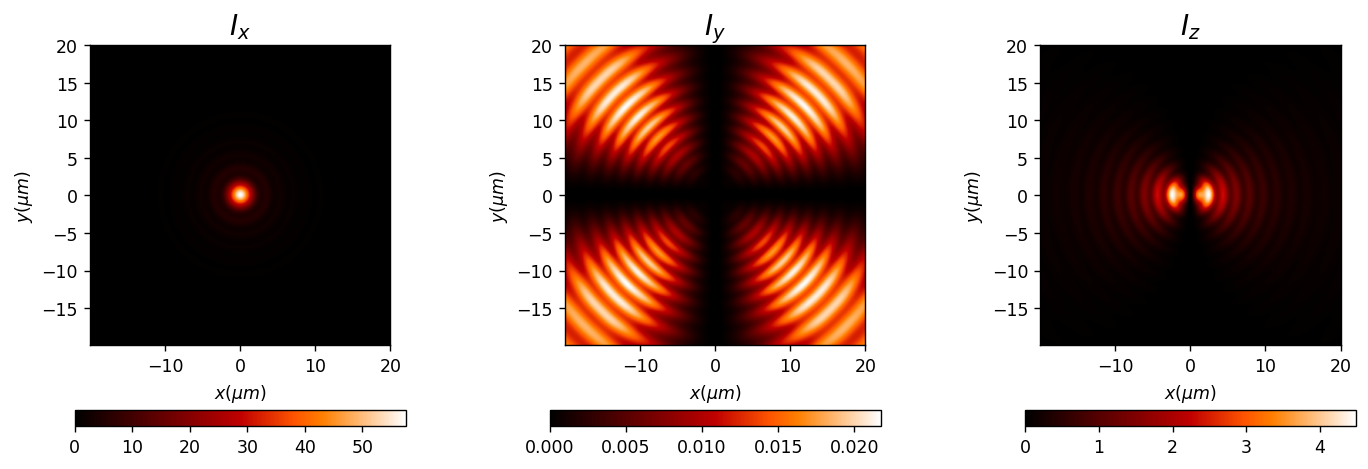

In [35]:
%%time

E_VRS_normal=E0
E_VRS_normal=kernel_proposal(E_VRS_normal, z=focal, n=1, new_field=True, verbose=False, amplification=(1,1))
E_VRS_normal.draw(kind='intensities', logarithm=False)
print(E_VRS_normal.get('intensity').sum())



499731.1429817077


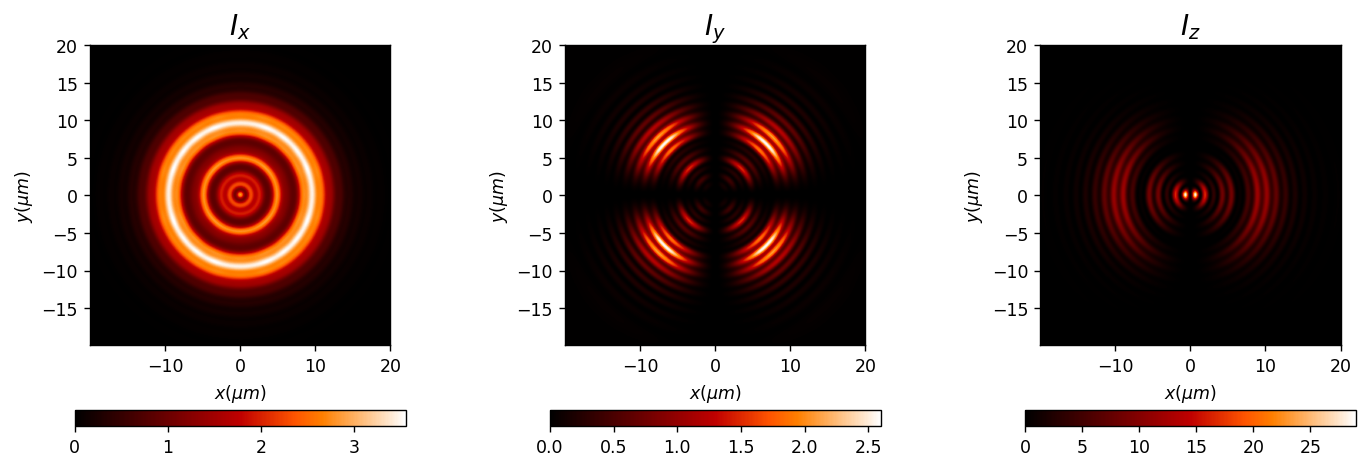

398681.6022850107


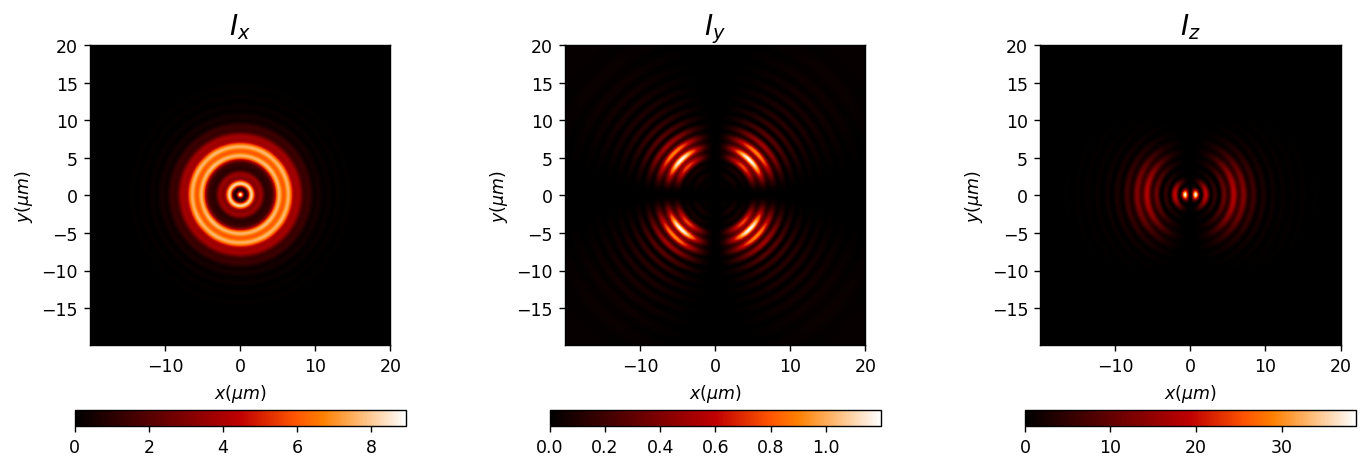

335247.0291308734


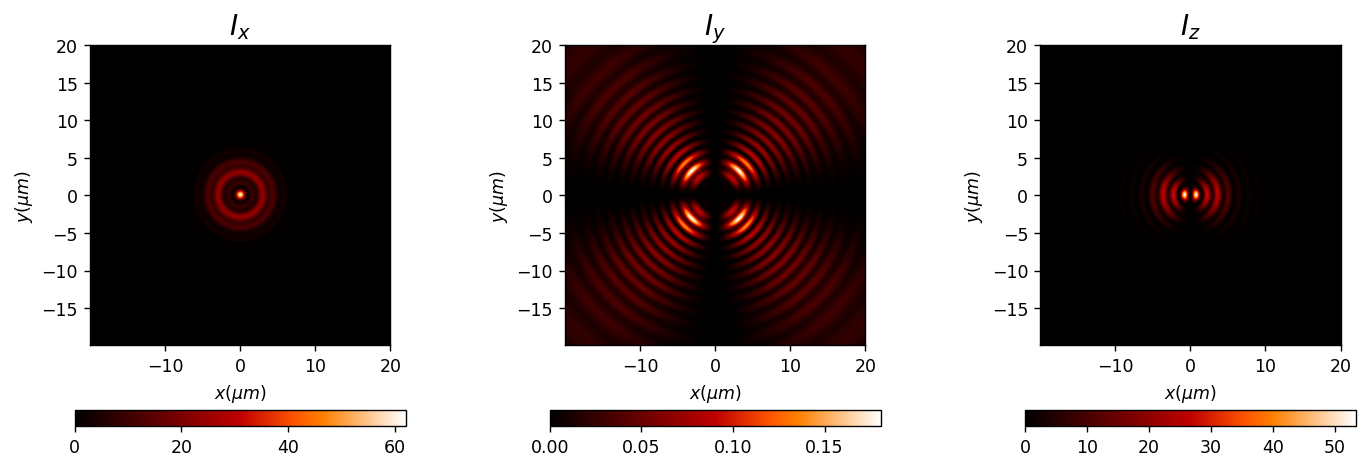

291704.53504450625


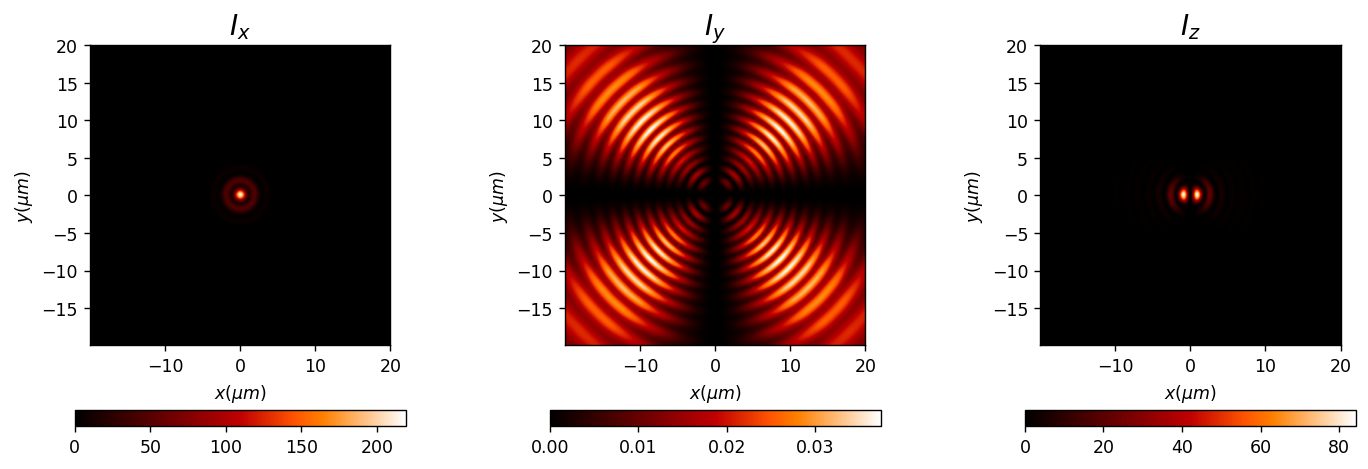

257594.58290660087


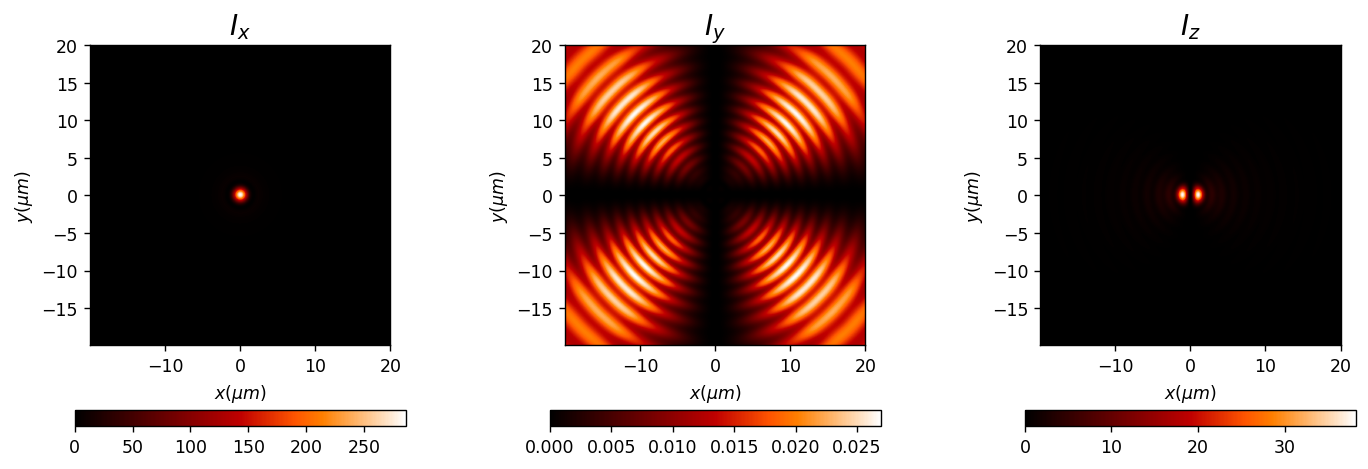

229556.05682466383


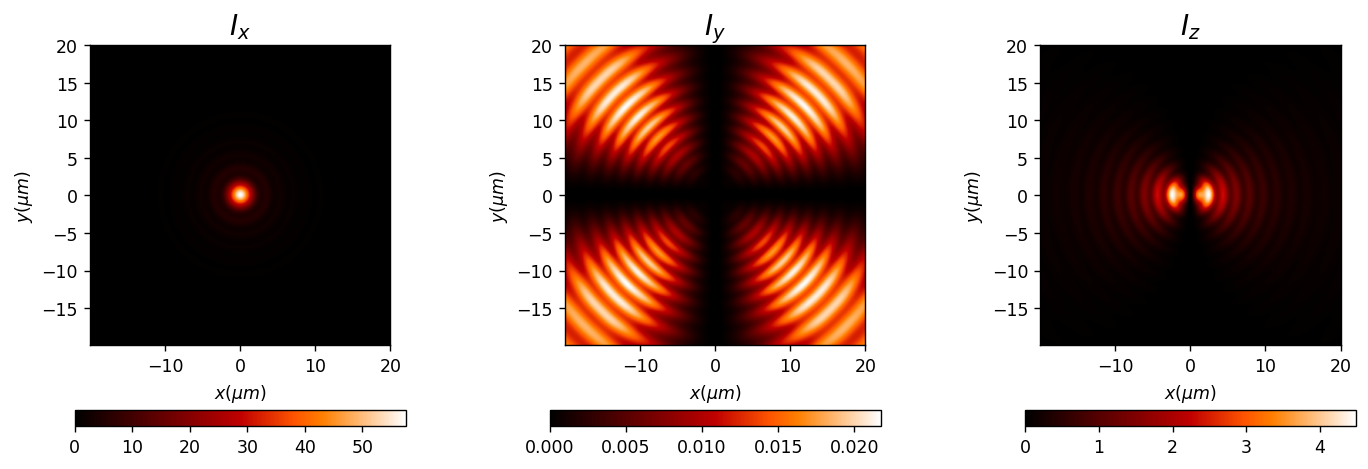

CPU times: user 18.5 s, sys: 2.77 s, total: 21.3 s
Wall time: 16.3 s


In [36]:
%%time
num_divisiones=6

E_VRS_new=E0
for i in range(num_divisiones):
    E_VRS_new=kernel_proposal(E0, z=(i+1)*focal/num_divisiones, n=1, new_field=True, verbose=False, amplification=(1,1))
    E_VRS_new.draw(kind='intensities', logarithm=False);
    print(E_VRS_new.get('intensity').sum())

    plt.show()


<AxesSubplot:title={'center':'$Intensity$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>

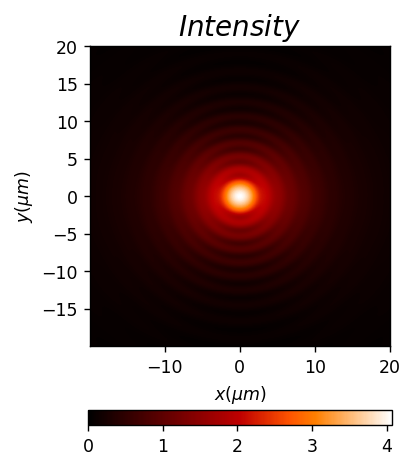

In [37]:
E_VRS_new.draw('intensity', logarithm=True)

## Prueba con propagación en vacío solametne

457929.11550885305


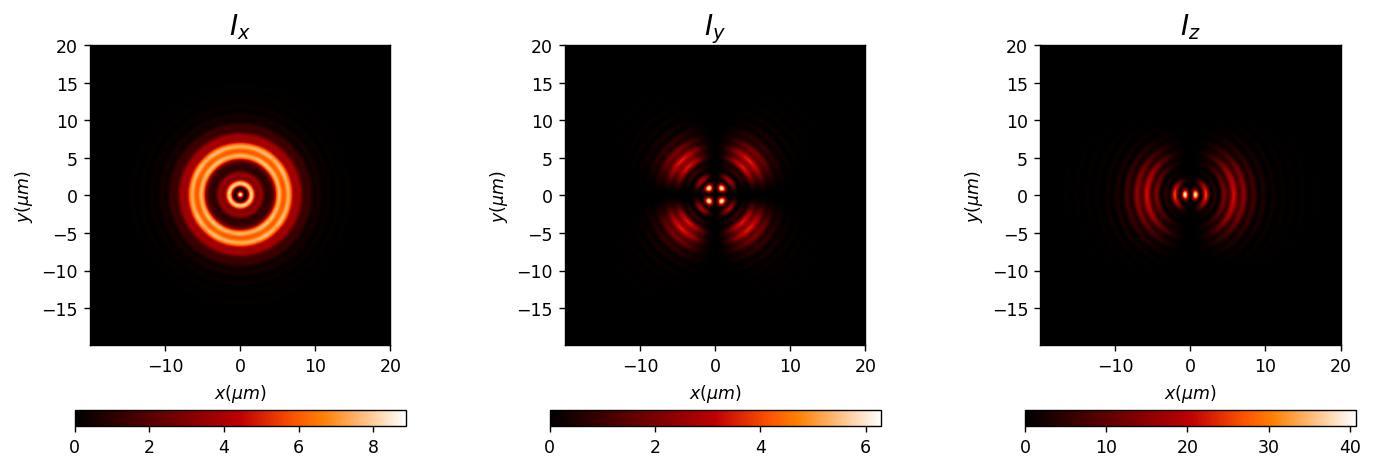

429349.3547579059


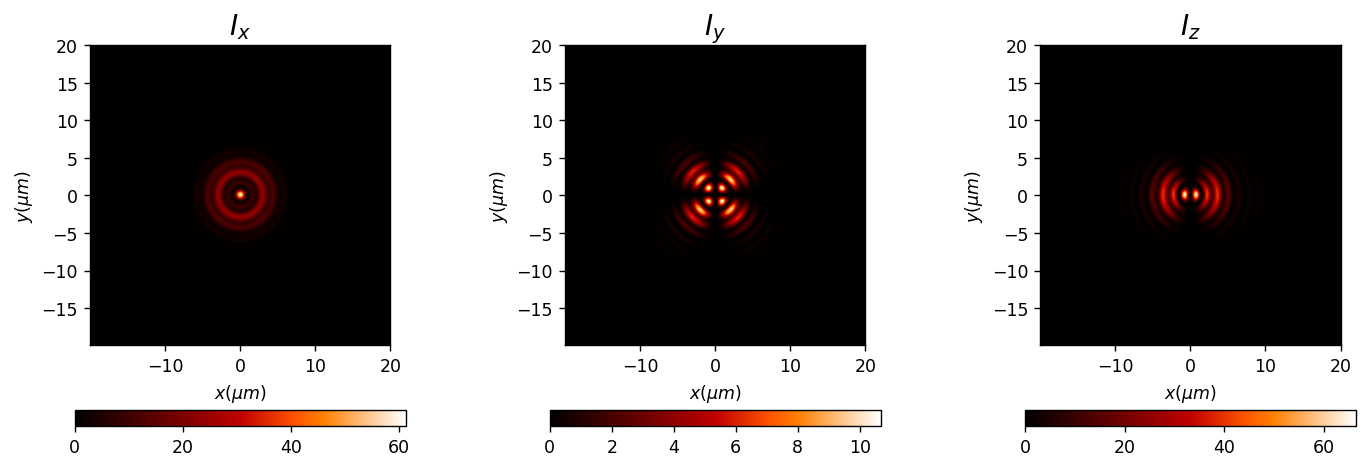

402584.74005046074


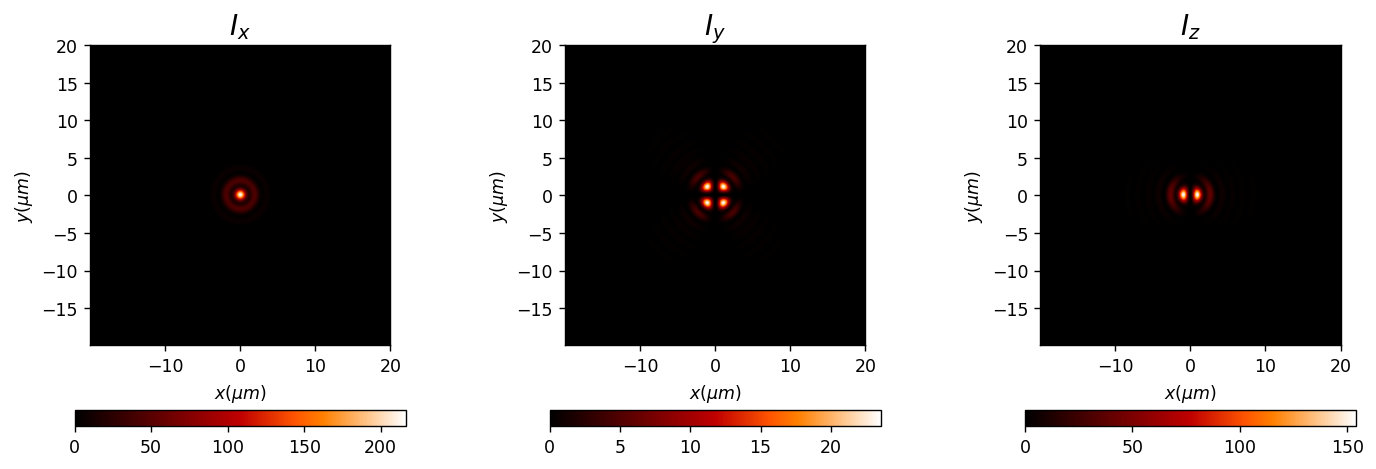

371411.6454908733


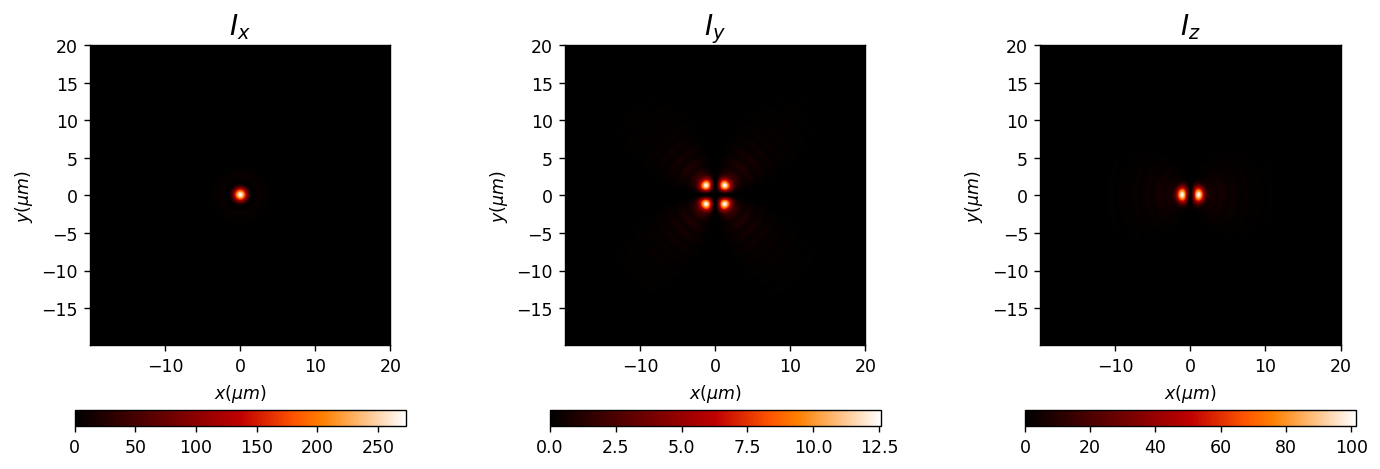

CPU times: user 10.3 s, sys: 1.78 s, total: 12.1 s
Wall time: 8.76 s


In [41]:
%%time
num_divisiones=6

E_VRS_new=kernel_proposal(E0, z=focal/(num_divisiones), n=1, new_field=True, verbose=False, amplification=(1,1))

for i in range(num_divisiones-2):
    E_VRS_new=VRS0(E_VRS_new, z=focal/(num_divisiones), n=1, new_field=True, verbose=False, amplification=(1,1))
    E_VRS_new.draw(kind='intensities', logarithm=False);
    print(E_VRS_new.get('intensity').sum())

    plt.show()

## Con el algoritmo propiamente

499731.1429817077


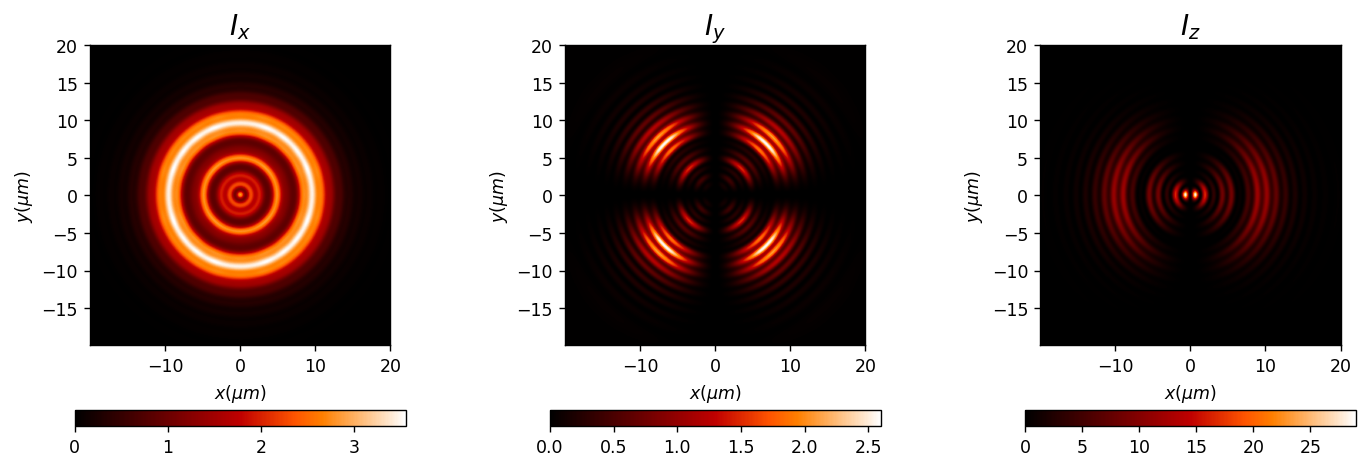

763347.0670691001


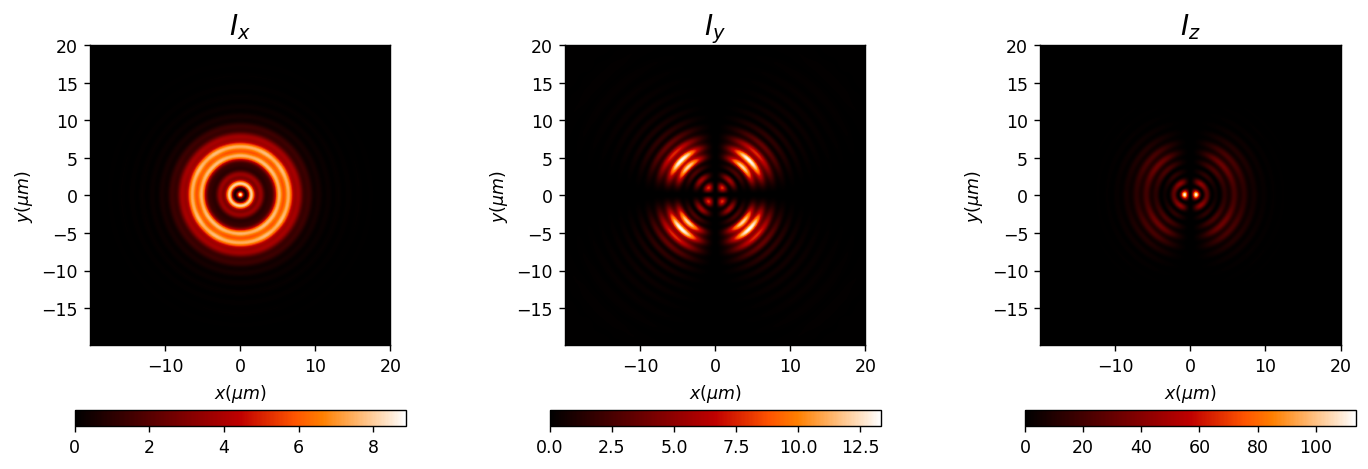

964780.9177401147


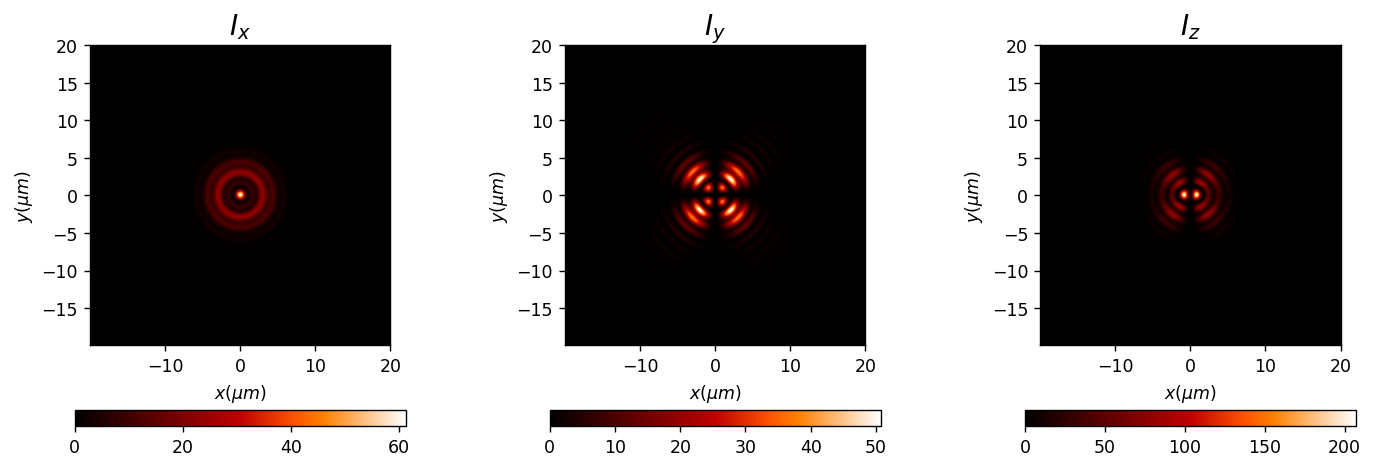

1105295.193768352


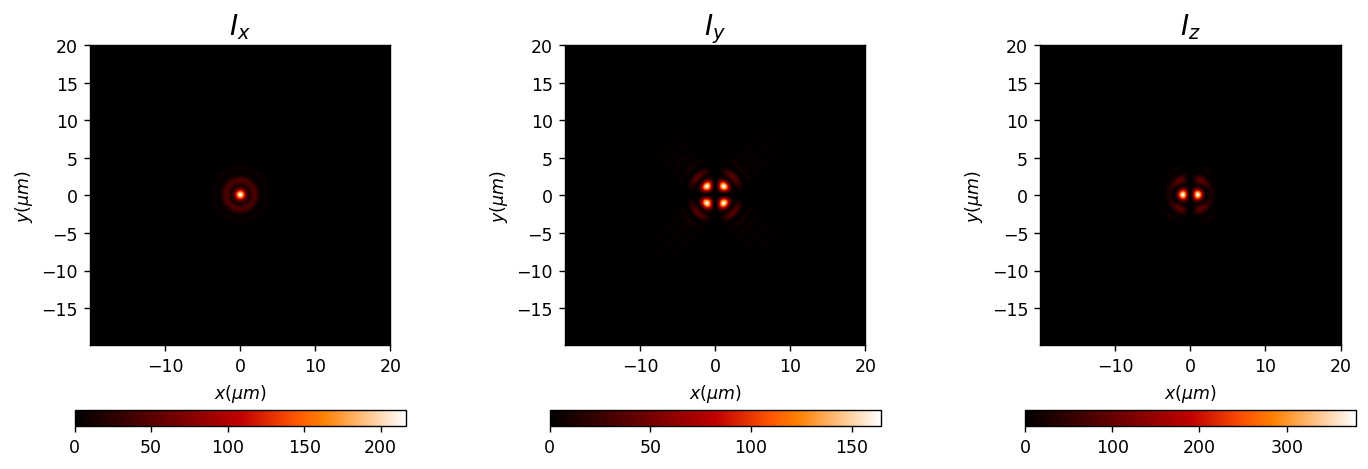

CPU times: user 12.7 s, sys: 1.81 s, total: 14.5 s
Wall time: 11.2 s


In [39]:
%%time
num_divisiones=6

E_VRS_new=E0

for i in range(num_divisiones-2):
    E_VRS_new=kernel_proposal(E_VRS_new, z=focal/(num_divisiones), n=1, new_field=True, verbose=False, amplification=(1,1))
    E_VRS_new.draw(kind='intensities', logarithm=False);
    print(E_VRS_new.get('intensity').sum())

    plt.show()


<AxesSubplot:title={'center':'$Intensity$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>

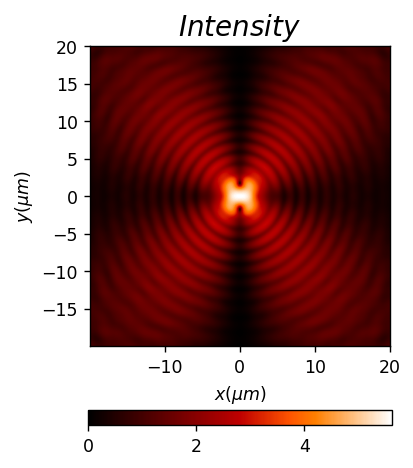

In [24]:
E_VRS_new.draw('intensity', logarithm=1)